# Otimização de Resistência ao Avanço de Pontão

## 1. Introdução <a name="1"></a>

Neste relatório, abordamos uma jornada rumo ao aprimoramento de nossas habilidades em engenharia e design de sistemas oceânicos, guiados pelos ensinamentos e pela visão holística do Professor Richard Schachter, cuja expertise nos permitiu transcender a compreensão convencional de otimização no âmbito de Projetos de Sistemas Oceânicos 3. Sob a luz de sua orientação, fomos desafiados a repensar a forma como abordamos o projeto e a otimização de embarcações, com o objetivo de não apenas atingir soluções eficientes para casos específicos, mas, através do entendimento da metodologia proposta, buscar extrair princípios universais aplicáveis a uma ampla gama de desafios de engenharia - naval, principalmente.

## 2. Enunciado <a name="2"></a>
O enunciado do exercício proposto em aula no dia 05/04/2024 consistiu no seguinte texto: <br />
<i>"Organize o processo de projeto (com todas as fórmulas) para o dimensionamento de um pontão otimizado a ser rebocado a 8kn em rios largos e profundos, sem vento ou correnteza, de volume total de 1200 $m^3$ com menor resistência ao avanço possível, respeitando todas as restrições. Fazer fluxograma iterativo com todos os fatores de projeto com nomes e encadeados (sequência, iterações, interações), com todos os parâmetros e fórmulas do projeto."</i>

E as seguintes restrições foram especificadas:
$$\frac{L}{D} >= 14$$
$${\nabla}= 30m^3$$ 
$$ GM >= 1m$$

Sendo $L$ o comprimento do navio, $B$ sua boca, $D$ seu pontal, $T$ seu calado, $\nabla$ seu volume submerso e $GM$ a altura metacêntrica.

## 3. Fluxograma Interativo de Projeto <a name="3"></a>

Escrever e anexar imagem do fluxograma

## 4. Módulos Computacionais <a name="4"></a>

Para que a organização do processo de projeto elucidada no fluxograma iterativo seja, em última análise, implementada como um algoritmo de otimização em Python, é necessário definir as fórmulas e parâmetros que regem o dimensionamento do pontão. A seguir, apresenta-se as equações e variáveis que compõem o modelo computacional proposto - e a implementação dos fatores de projeto como módulos computacionais reutilizáveis.

Quando necessário, faz-se a distinção entre equações do tipo "geral" e "modelo", sendo as primeiras aplicáveis a qualquer tipo de embarcação, e as segundas, restritas ao projeto em questão (no caso, de um pontão).


### Variáveis Gerais

In [293]:
model_Vs = 8/1.944 # Velocidade de serviço do pontal, em m/s

### Modelo Físico

#### Modelo

In [294]:
# Constantes
model_g = 9.805  # Aceleração gravitacional na superfície terrestre, em m/s^2
model_p = 1025  # Densidade da água salgada, em kg/m^3
model_v = 1.14*(10**-6) # Viscosidade cinemática da água salgada em m^2/s

### Forma

In [295]:
def get_Cb(nabla: float, L: float, B: float, T: float):
    # Coeficiente de Bloco
    # nabla: volume submerso
    # L: comprimento
    # B: boca
    # T: calado
    return nabla/(L*B*T)
    

#### Modelo

In [296]:
def get_model_volume(L: float, B: float, D: float):
    # Volume
    # L: comprimento
    # B: boca
    # T: calado
    return L*B*D

def get_model_underwater_volume(L: float, B: float, T: float) -> float:
  # Volume submerso de pontal
  return L*B*T

def get_model_Sw(L: float, B: float, T: float):
    # Área molhada de pontal
    return 2*(L*T) + B*L + 2*(B*T)

def get_model_Ix(L: float, B: float, T: float):
    # Momento de inércia longitudinal
    return (1/12)*L*(B**3)

def get_model_Cp(Cb: float):
    # Coeficiente prismático
    # Cb: Coeficiente de Bloco
    # TODO: existe uma fórmula mais confiável para um pontal?
    return 0.990 * Cb

def get_model_k(L: float, B: float, Cb: float):
    # Fator de forma
    # Fórmula de Conn e Ferguson
    # TODO: existe uma fórmula mais confiável para um pontal?
    return 18.7*((Cb*B/L)**2)

### Establidade

In [297]:
def get_BM(Ix: float, nabla: float) -> float:
  # Raio metacêntrico
  # Ix: Momento de inércia longitudinal
  # nabla: Volume submerso
  return Ix/nabla

def get_GM(KB: float, BM: float, KG: float) -> float:
  # Altura Metacêntrica
  # KB: Altura do centro de carena
  # BM: Raio metacêntrico
  # KG: Altura do centro de gravidade vertical
  return KB + BM - KG

#### Modelo

In [298]:
def get_model_KB(T: float) -> float:
  # Altura do centro de carena
  return T/2

def get_model_BM(L: float, B: float, T: float) -> float:
  # Raio metacêntrico
  return get_BM(
    Ix=get_model_Ix(L=L, B=B, T=T),
    nabla=get_model_underwater_volume(L=L, B=B, T=T)
  )

### Peso

#### Modelo

In [299]:
model_Faa = 0.11 # Fator de aço

def get_model_lightweight(L: float, B: float, D: float) -> float:
  # Peso leve
  # L: comprimento
  # B: boca
  # D: calado
  return model_Faa * get_model_volume(L=L, B=B, D=D)

def get_model_KG(D: float) -> float:
  # Altura do centro de gravidade vertical
  return D/2

### Resistência ao Avanço

In [300]:
from math import sqrt

def get_Rt(p: float, Sw: float, V: float, Ct: float):
    # Resistência total
    # p = densidade volumétrica do fluido
    # Sw = área molhada
    # V = velocidade
    # C = coeficiente de resistência total
    return (1/2)*p*Sw*(V**2)*Ct

def get_Re(L: float, V: float, v: float):
    # Número de Reynolds
    # L: comprimento do navio
    # V: velocidade do navio
    # v: viscosidade cinemática do fluido
    return (V*L/v)

def get_Fn(L: float, V: float, g: float):
    # Número de Froude
    # L: comprimento
    # V: velocidade
    # g: aceleração da gravidade
    return V/sqrt(g*L)


#### Modelo

O modelo proposto para cálculo da resistência total ao avanço se baseou no "método de previsão de desempenho ITTC1978", utilizando as fórmulas de aproximação de Fisher à série de Taylor-Gertler para cálculo do coeficiente de resistência residual e diferentes fórmulas semi-empíricas para cálculo de outros parâmetros que se mostraram relevantes ao longo do processo.
As fórmulas do método são sumarizadas abaixo: <br />
<img src="./images/ITTC1978_perfomance_prediction.png" width="700" />
 
Referência: Molland, Ship Resistance and Propulsion, página 87 <br />
(http://kashti.ir/files/ENBOOKS/Ship%20resistance%20and%20propulsion%20_%20F.Molland%20(2011).pdf)

Como não estamos buscando extrapolar os resultados de um modelo para uma escala distinta, mas estimar o coeficiente de resistência ao avanço de forma rápida e simples, calculamos o coeficiente de resistência residual com as fórmulas de aproximação de Fisher à série de Taylor-Gertler: <br />
<img src="./images/fisher_formula_for_residual_resistance_coefficient.png" width="600" /> 

Referência: Moody, Preliminary Power Prediction During Early Stages of a Ship, página 18 <br />
(https://core.ac.uk/download/pdf/148365163.pdf)

Como tal exercício é meramente pedagógico, permite-se que o intervalo de aplicabilidade da aproximação de Fisher, conforme fórmula abaixo, seja extraplolado : <br />
<img src="./images/fisher_range_of_application_for_residual_resistance_coefficient_formula.png" width="400" /> 

In [301]:
from math import log10

def get_model_Cf(L: float, V: float, p: float, v: float):
    # Coeficiente de resistência friccional
    # L: comprimento
    # V: velocidade
    # p: densidade do fluido
    # v: viscosidade cinemática do fluido
    
    Re = get_Re(L=L, V=V, v=v)
    return 0.075/ (log10(Re) - 2)**2

def get_model_Ct(k: float, Cf: float, Cr: float, delta_Cf: float, Caa: float):
    # Coeficiente de resistência total
    return (1+k)*Cf + Cr + delta_Cf + Caa

def get_model_Cr(L: float, B: float, T: float, nabla: float, Cp: float, V: float, g: float):
    # Coeficiente de resistência residual
    # L: comprimento
    # B: boca
    # T: calado
    # nabla: volume submerso
    # Cp: coeficiente prismático
    # V: velocidade

    Fn = get_Fn(L=L, V=V, g=g)
    SLX = 3.3613*Fn + Cp - 0.7
    CRB = -1.83 + 14.02*SLX - 27*(SLX**2) + 18.32*(SLX**3)
    return (CRB + 0.12*(B/T-3) + 50*(nabla/(L**3) - 0.007))/1000

def get_model_deltaCf(L: float):
    # Tolerância de rugosidade
    # L: comprimento
    return (105*(((150*(10**-6))/L)**(1/3)) - 0.64) * (10**-3)

def get_model_Caa(B: float, D: float, T: float, Sw: float):
    # Coeficiente de resistência do ar
    # B: boca
    # D: pontal
    # T: calado
    # Sw: área molhada

    At = B*(D-T)*0.8  # Área transversal acima da linha d'água
    return 0.001*At/Sw

## 5. Otimização <a name="5"></a>

Então procede-se para otmização em Python. Para a aplicação no contexto vigente, pode-se sumarizar o entendimento da otimização como a implementação de uma rotina que espera três (03) parâmetros como input:

1. **bounds**: uma lista de limites (máximos e mínimos) para os possíveis valores dos parâmetros alterados ao longo da otimização;
2. **constraints**: uma lista de dicionários representando restrições para os possíveis valores dos parâmetros alterados ao longo da otimização;
3. **fun**: uma função que calcula e retorna o valor a ser otimizado;

Em termos matemáticos, a função de otimização resolve o seguinte problema:

<br />
<img src="./images/minimize_function.png" width="500" /> 
<br />

Onde $F(x)$ corresponde ao parâmetro **fun**; $X$ corresponde ao vetor de parâmetros, cuja ordem dos elementos vem da ordem definida pelos limites do parâmetro **bounds**;  $C_j(X) = 0$ é uma restrição de igualdade e $C_j(X) >= 0$ uma restrição de desigualdade, que são definidas no parâmetro **constraints**; e $XL <= x <= XU$ é um conjunto de limites (L sendo o limite inferior e U o limite superior), que são definidos no parâmetro **bounds**.

Seguindo a ordem da explicação dos parâmetros dada acima, a seguir desenvolve-se o passo-a-passo para configuração do ambiente de Python e definição do que é esperado para cada parâmetro.

### 5.1 Configuração do Ambiente  <a name="5.1"></a>

Para aplicar a otimização, utiliza-se algoritmos da biblioteca Scipy do Python. Caso encontre algum erro indicando a necessidade de se instalar a biblioteca Scipy após execução desse notebook, descomente e execute as últimas linhas da cédula abaixo para instalar a biblioteca.

In [302]:
# O módulo sys fornece várias funções e variáveis que são usadas para manipular
# diferentes partes do ambiente de execução do Python.
# Isso fornece uma maneira mais segura de instalar pacotes.

# import sys
# !{sys.executable} -m pip install scipy
# !{sys.executable} -m pip install numpy
# !{sys.executable} -m pip install matplotlib

E define-se o tipo do vetor de otimização:

In [303]:
# L, B, D, T
type X = tuple[float, float, float, float]

### 5.2 Limites | bounds  <a name="5.2"></a>

Define-se uma sequência de tuplas, cada uma representando um limite do tipo $L <= x <= U$. Nota-se que a ordem dos limites define a ordem dos parâmetros alterados no vetor de resultados. 

In [304]:
def build_bounds():
    '''Uma função que define limites (inferior e superior) para cada parâmetro
    a ser alterado ao longo da otimização.


    Retorna
    -------
    out : sequence, tup
        Sequência de tuplas, cada uma representando um limite mínimo e máximo
        para um parâmetro específico.
        

    Notas
    -----
    A ordem dos dicionários com limites retornados deve seguir a ordem correspondente
    dos parâmetros definidos no vetor de chute inicial (x0). O valor "None" representa
    a ausência de um máximo ou mínimo.
    '''

    L_bound = (0, 10000)
    B_bound = (0, 100)
    D_bound = (0, 100)
    T_bound = (0, 20)
    return (
        L_bound,
        B_bound,
        D_bound,
        T_bound
    )

### 5.3 Restrições | constraints  <a name="5.3"></a>

Define-se uma sequência de dicionários em Python, cada um representando uma restrição do tipo $C_j(X) >= 0$ (nesse caso, estamos lidando apenas com desigualdades) e cada dicionário contendo as chaves **"type"** (para definir se a restrição é uma igualdade ou desigualdade) e **"func"** (definindo a restrição em si). Nesse caso, a ordem das restrições definidas na sequência deve ser coerente com a ordem das restrições passadas pelo argumento **bounds** anteriormente definido.

In [329]:
def build_constraints():
    '''Uma função que constrói restrições relacionando dois ou mais parâmetros
    ou limites que devem ser calculados a partir do conjunto de parâmetros x.


    Retorna
    -------
    out : sequence, dict
        Sequência de dicionários, cada um representando uma restrição específica, 
        contendo as chaves "type" e "fun".

        "type" : {"eq", "ineq"}
            Determina se a restrição é uma igualdade ou desigualdade.

        "fun" : callable
            A função definindo a restrição. Recebe o vetor de parâmetros x de
            determinada iteração (na ordem definida pelo vetor inicial x0).
            Restrições de igualdade significam que o resultado da função "fun"
            deve ser 0 (fun(x) == 0) enquanto que restrições de desigualdade 
            significam que o resultado deve ser não-negativo (fun(x) >= 0).
            
            
    Ver também
    --------
    https://stackoverflow.com/questions/42303470/scipy-optimize-inequality-constraint-which-side-of-the-inequality-is-considere/42304099

    Notas
    -----
    Restrições tipicamente não necessitam de uma função "build" para serem definidas,
    sendo geralmente mais sucintamente definidas com "func" sendo uma função anônima 
    (lambda). A decisão de criar a função "build_constraints" foi baseada no objetivo
    de aumentar a legibilidade do código e esclarecer onde cada restrição do problema
    foi definida.
    '''

    def get_volume_constraint(x: X):
        '''V = 1200'''
        L, B, D = x[0], x[1], x[2]
        return get_model_volume(L=L, B=B, D=D) - 1200 # == 0

    def get_underwater_volume_constraint(x: X):
        '''nabla = 30'''
        L, B, T = x[0], x[1], x[3]
        return get_model_underwater_volume(L=L, B=B, T=T) - 30 # == 0
    
    def get_L_over_D_constraint(x: X):
        '''L/D >= 14'''
        L, D = x[0], x[2]
        return L/D - 14 # >= 0

    def get_GM_constraint(x: X):
        '''GM >= 1'''
        L, B, D, T = x[0], x[1], x[2], x[3]
        KB = get_model_KB(T=T)
        BM = get_model_BM(L=L, B=B, T=T)
        KG = get_model_KG(D=D)
        return get_GM(KB=KB, BM=BM, KG=KG) - 1  # >= 0
    
    def get_weight_constraint(x: X):
        '''Navio não afunda'''
        L, B, D = x[0], x[1], x[2]
        W = get_model_lightweight(L=L, B=B, D=D)
        T_calculated_from_weight = W / (B * L * model_p)
        return D - T_calculated_from_weight  # >= 0
    

    # Outras restrições

    # Coeficientes de resistência
    def Cf_constraint(x: X):
        '''Cf >= 0'''
        L = x[0]
        return get_model_Cf(L=L, V=model_Vs, p=model_p, v=model_v)  # >= 0
    
    def Cr_constraint(x: X):
        '''Cr >= 0'''
        L, B, T = x[0], x[1], x[3]
        nabla = get_model_underwater_volume(L=L, B=B, T=T)
        Cp = get_model_Cp(Cb=get_Cb(nabla=nabla, L=L, B=B, T=T))
        return get_model_Cr(L=L, B=B, T=T, nabla=nabla, Cp=Cp, V=model_Vs, g=model_g)  # >= 0
    
    def deltaCf_constraint(x: X):
        '''deltaCf >= 0'''
        L = x[0]
        return get_model_deltaCf(L=L)  # >= 0
    
    def Caa_constraint(x: X):
        '''Caa >= 0'''
        L, B, D, T = x[0], x[1], x[2], x[3]
        Sw = get_model_Sw(L, B, D)
        return get_model_Caa(B=B, D=D, T=T, Sw=Sw)  # >= 0
    

    return (
        # Principais restrições
        {'type': 'eq', 'fun': get_volume_constraint},
        {'type': 'eq', 'fun': get_underwater_volume_constraint},
        {'type': 'ineq', 'fun': get_L_over_D_constraint},
        {'type': 'ineq', 'fun': get_GM_constraint},
        {'type': 'ineq', 'fun': get_weight_constraint},
        
        # Outras restrições
        # Coeficientes de resistência
        {'type': 'ineq', 'fun': Cf_constraint},
        {'type': 'ineq', 'fun': Cr_constraint},
        {'type': 'ineq', 'fun': deltaCf_constraint},
        {'type': 'ineq', 'fun': Caa_constraint}
    )

### 5.4 Função Objetivo | func  <a name="5.4"></a>

Uma função que, a partir de um conjunto de parâmetros que podem ser alterados (dentro das restrições e limites definidos anteriormente), retorna o valor calculado do coeficiente de resistência total, que é o que em última análise buscamos minimizar.

In [330]:
def objective_function(x: X):
    '''Uma função que calcula o valor a ser otimizado a partir das fórmulas
    do modelo computacional proposto, calculadas a partir do conjunto de parâmetros que podem ser
    alterados ao longo da otimização.

    Parâmetros
    -------
    x : list
        Uma lista de parâmetros, cuja ordem segue a ordem definida para
        o vetor de chute inicial (x0)

    Retorna
    -------
    out : float
        O valor otimizado, calculado a partir dos parâmetros da função
    '''
    L, B, D, T = x
    
    # Volume submerso
    nabla = get_model_underwater_volume(L=L, B=B, T=T)

    # Coefiente de bloco
    Cb = get_Cb(nabla=nabla, L=L, B=B, T=T)

    # Área molhada
    Sw = get_model_Sw(L=L, B=B, T=T)

    # Coeficiente de resistência total
    Ct = get_model_Ct(
        k=get_model_k(L=L, B=B, Cb=Cb), # Fator de forma
        Cf=get_model_Cf(L=L, V=model_Vs, p=model_p, v=model_v), # Coeficiente de resistência friccional
        Cr=get_model_Cr(nabla=nabla, L=L, B=B, T=T, Cp=get_model_Cp(Cb=Cb), V=model_Vs, g=model_g), # Coeficiente de resistência residual
        delta_Cf=get_model_deltaCf(L=L), # Tolerância de rugosidade
        Caa=get_model_Caa(B=B, D=D, T=T, Sw=Sw) # Coeficiente de resistência do ar
    )

    # Resistência total
    return get_Rt(
        p=model_p, # Densidade do fluido
        Sw=Sw, # Área molhada
        V=model_Vs, # Velocidade
        Ct=Ct # Coeficiente de resistência total
    )

### 5.5 Execução  <a name="5.5"></a>

Finalmente, utiliza-se os valores desenvolvidos acima como argumentos para cada parâmetro da função de otimização.

In [331]:
from scipy.optimize import minimize # type: ignore
# from typing import cast

# Variáveis livres iniciais
L0 = 140

# L/D >= 14
D0 = L0/14

# volume = LBD = 1200. Logo, B = 1200/(L*D)
B0 = 1200/(L0*D0)

# volume = LBD = 1200 e volume submerso = LBT = 30. 
# Logo, D/T = 30 -> T = 30/D
T0 = 30/D0

XO: X = (L0, B0, D0, T0)  

type XAndFunResults = list[list[float]]
x_and_fun_results: XAndFunResults = []
def callback(intermediate_x: X):
    fun = objective_function(intermediate_x)
    result = [intermediate_x[0], intermediate_x[1], intermediate_x[2], intermediate_x[3], fun]
    x_and_fun_results.append(result)


_ = minimize( # type: ignore
    x0=XO,
    fun=objective_function,
    bounds=build_bounds(),
    constraints=build_constraints(),
    method='SLSQP',
    callback=callback
)


0.0010731707317073172
0.0010731707317073172
0.0010731707317073172
0.0010731707317073172
0.0010731707317073172
0.0010731707333064661
0.0010731707317073172
0.0003868015990127133
0.0010045338184378567
0.0010045338184378567
0.0010045338184378567
0.001004533818437857
0.0010045338200370057
0.0010045338184378567
0.0003650550804464188
0.0009405859446387131
0.0009405859446387131
0.0009405859446387131
0.0009405859446387129
0.000940585946237862
0.0009405859446387131
0.0003438056423640012
0.0008809079144112419
0.0008809079144112419
0.000880907914411242
0.0008809079144112419
0.000880907916010391
0.0008809079144112419
0.000323811554988401
0.0008251982784689579
0.0008251982784689579
0.0008251982784689579
0.0008251982784689577
0.0008251982800681069
0.0008251982784689579
0.0003051012990835367
0.0007731885805304157
0.0007731885805304157
0.0007731885805304158
0.0007731885805304157
0.0007731885821295647
0.0007731885805304157
0.00028760890879530633
0.0007246306133569047
0.0007246306133569047
0.000724630613

C:\Users\Leonardo\AppData\Local\Temp\ipykernel_13612\3702488339.py:7: RuntimeWarning: invalid value encountered in scalar divide
  return nabla/(L*B*T)
C:\Users\Leonardo\AppData\Local\Temp\ipykernel_13612\2161558678.py:29: RuntimeWarning: divide by zero encountered in scalar divide
  return (CRB + 0.12*(B/T-3) + 50*(nabla/(L**3) - 0.007))/1000
C:\Users\Leonardo\AppData\Local\Temp\ipykernel_13612\2187824072.py:5: RuntimeWarning: divide by zero encountered in scalar divide
  return Ix/nabla


## 6 Resultados  <a name="6"></a>

Após a execução do algoritmo de otimização, obtém-se o valor mínimo da resistência total dentro das restrições impostas. Analisamos os resultados em termos do resultado final e da evolução do processo de otimização.

### 6.1 Verificação das Principais Restrições  <a name="6.1"></a>

C:\Users\Leonardo\AppData\Local\Temp\ipykernel_13612\2446109312.py:20: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


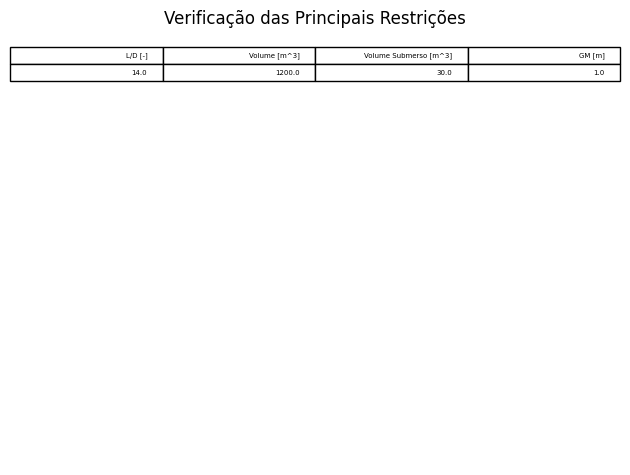

In [332]:
# type: ignore
import matplotlib.pyplot as plt

def plot_restrictions_table(x: X):
    L, B, D, T, Rt = x

    L_over_D = L/D
    volume = get_model_volume(L=L, B=B, D=D)
    nabla = get_model_underwater_volume(L=L, B=B, T=T)
    GM = get_GM(KB=get_model_KB(T=T), BM=get_model_BM(L=L, B=B, T=T), KG=get_model_KG(D=D))

    fig, ax = plt.subplots()
    fig.suptitle('Verificação das Principais Restrições')
    ax.axis('off')
    table_data = [
        ['L/D [-]', 'Volume [m^3]', 'Volume Submerso [m^3]', 'GM [m]'],
        [round(val, 2) for val in [L_over_D, volume, nabla, GM]]
    ]
    ax.table(cellText=table_data, loc='top')
    fig.tight_layout()
    plt.show()

plot_restrictions_table(x_and_fun_results[-1])

### 6.2 Resultados Finais  <a name="6.2"></a>

C:\Users\Leonardo\AppData\Local\Temp\ipykernel_13612\567208533.py:15: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


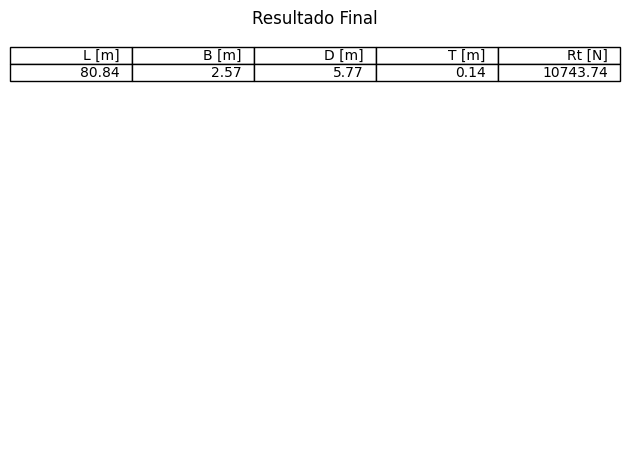

In [309]:
# type: ignore
import matplotlib.pyplot as plt

def plot_final_results_table(x: X):
    L, B, D, T, Rt = x

    fig, ax = plt.subplots()
    fig.suptitle('Resultado Final')
    ax.axis('off')
    table_data = [
        ['L [m]', 'B [m]', 'D [m]', 'T [m]', 'Rt [N]'],
        [round(val, 2) for val in [L, B, D, T, Rt]]
    ]
    ax.table(cellText=table_data, loc='top')
    fig.tight_layout()
    plt.show()

plot_final_results_table(x_and_fun_results[-1])

### 6.3 Visualização 3D de Resultados  <a name="6.3"></a>

Aqui apresentamos uma visualização 3D de todos os resultados obtidos ao longo do processo de otimização, com o objetivo de fornecer uma perspectiva mais abrangente do espaço de soluções.
Nota-se que a visualização do calado foi excluída devido à dificuldade de representação de 4 dimensões (L, B, D, T) em 3D.


C:\Users\Leonardo\AppData\Local\Temp\ipykernel_13612\2344802286.py:19: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


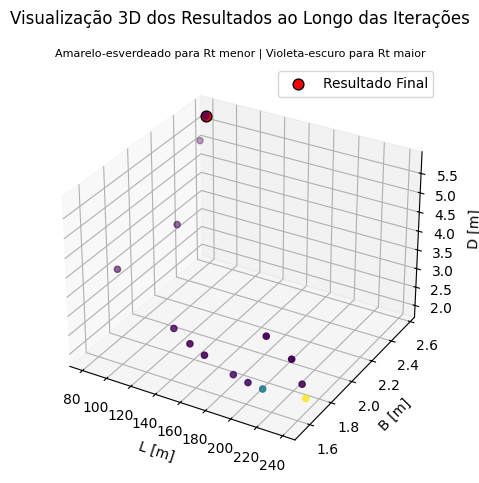

In [310]:
# type: ignore
import matplotlib.pyplot as plt

def plot_3D_results(x_and_fun_results: XAndFunResults):
    x = [x[0] for x in x_and_fun_results]
    y = [x[1] for x in x_and_fun_results]
    z = [x[2] for x in x_and_fun_results]
    fun = [x[4] for x in x_and_fun_results]
    fig = plt.figure()
    fig.suptitle('Visualização 3D dos Resultados ao Longo das Iterações')
    ax = fig.add_subplot(projection='3d')
    ax.set_title('Amarelo-esverdeado para Rt menor | Violeta-escuro para Rt maior', fontsize=8)
    ax.scatter(x, y, z, c=fun, cmap='viridis')
    ax.scatter(L, B, D, color='r', s=60, edgecolor='black', label='Resultado Final')
    ax.set_xlabel('L [m]')
    ax.set_ylabel('B [m]')
    ax.set_zlabel('D [m]')
    ax.legend()
    fig.tight_layout()
    plt.show()

plot_3D_results(x_and_fun_results)

### 6.4 Evolução dos Resultados ao Longo das Iterações  <a name="6.4"></a>

C:\Users\Leonardo\AppData\Local\Temp\ipykernel_13612\1763950299.py:33: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


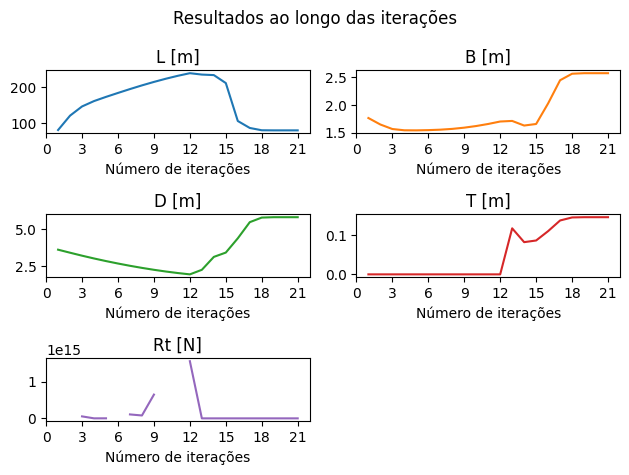

In [333]:
# type: ignore
import matplotlib.pyplot as plt

def plot_results_evolution(x: XAndFunResults):
    x = [x[0] for x in x_and_fun_results]
    y = [x[1] for x in x_and_fun_results]
    z = [x[2] for x in x_and_fun_results]
    w = [x[3] for x in x_and_fun_results]
    fun = [x[4] for x in x_and_fun_results]
    
    fig, axs = plt.subplots(nrows=3, ncols=2)
    niter_list = [i+1 for i in range(len(x_and_fun_results))]
    fig.suptitle('Resultados ao longo das iterações')
    axs[0, 0].plot(niter_list, x, 'tab:blue')
    axs[0, 0].set_title('L [m]')
    axs[0, 1].plot(niter_list, y, 'tab:orange')
    axs[0, 1].set_title('B [m]')
    axs[1, 0].plot(niter_list, z, 'tab:green')
    axs[1, 0].set_title('D [m]')
    axs[1, 1].plot(niter_list, w, 'tab:red')
    axs[1, 1].set_title('T [m]')
    axs[2, 0].plot(niter_list, fun, 'tab:purple')
    axs[2, 0].set_title('Rt [N]')

    for ax in axs.flat:
        ax.set(xlabel='Número de iterações')
        # Garantindo que os valores do eixo x sejam inteiros
        ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

    # Removendo último gráfico
    fig.delaxes(axs[2, 1])

    fig.tight_layout()
    plt.show()

plot_results_evolution(x_and_fun_results)

### 6.5 Visualização do Pontal Otimizado  <a name="6.5"></a>

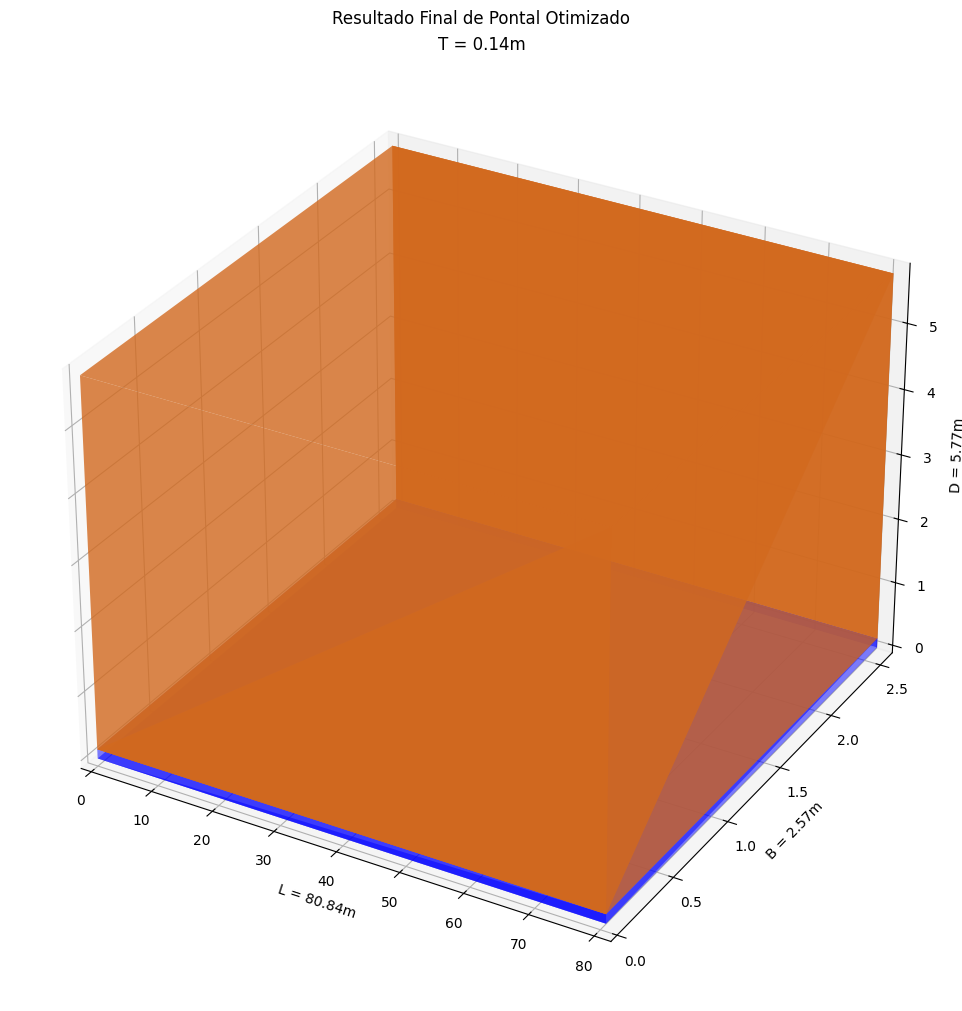

In [328]:
# type: ignore
import numpy as np
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt

def plot_result_as_dual_parallelepiped(x: tuple):
    L, B, D, T, _ = x  # Desempacota os valores

    # Pontos base para definição dos paralelepípedos
    base_points = np.array([
        [0, 0, 0], [1, 0, 0], [1, 1, 0], [0, 1, 0],
        [0, 0, 1], [1, 0, 1], [1, 1, 1], [0, 1, 1]
    ])

    # Transformações para os paralelepípedos
    P1 = [[L, 0, 0], [0, B, 0], [0, 0, T]]
    P2 = [[L, 0, 0], [0, B, 0], [0, 0, D - T]]

    # Calcula os vértices dos paralelepípedos
    Z1 = np.zeros((8, 3))
    for i in range(8):
        Z1[i, :] = np.dot(base_points[i, :], P1)

    Z2 = np.zeros((8, 3))
    for i in range(8):
        Z2[i, :] = np.dot(base_points[i, :], P2) + [0, 0, T]  # Desloca no eixo Z

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Define as faces dos paralelepípedos
    underwater = [Z1[0:4], Z1[4:8], np.append(Z1[0:2], Z1[5:7][::-1], axis=0),
              np.append(Z1[2:4], Z1[6:8][::-1], axis=0), Z1[[0, 1, 5, 4]], Z1[[2, 3, 7, 6]]]
    abovewater = [Z2[0:4], Z2[4:8], np.append(Z2[0:2], Z2[5:7][::-1], axis=0),
              np.append(Z2[2:4], Z2[6:8][::-1], axis=0), Z2[[0, 1, 5, 4]], Z2[[2, 3, 7, 6]]]

    # Plota os paralelepípedos

    ax.add_collection3d(Poly3DCollection(abovewater, facecolors='chocolate', linewidths=0, alpha=0.8))
    ax.add_collection3d(Poly3DCollection(underwater, facecolors='blue', linewidths=1, alpha=0.5))

    ax.set_xlim([0, L])
    ax.set_ylim([0, B])
    ax.set_zlim([0, D])
    ax.set_xlabel(f'L = {round(L, 2)}m')
    ax.set_ylabel(f'B = {round(B, 2)}m')
    ax.set_zlabel(f'D = {round(D, 2)}m')
    fig.suptitle('Resultado Final de Pontal Otimizado')
    fig.set_size_inches(10, 10) # Assim a label do eixo z não fica cortada
    ax.set_title(f'T = {round(T, 2)}m')
    plt.show()

plot_result_as_dual_parallelepiped(x_and_fun_results[-1])